In [1]:
!pip install --upgrade xgboost
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 762.0 kB/s eta 0:03:17
   ---------------------------------------- 0.5/150.0 MB 762.0 kB/s eta 0:03:17
   ---------------------------------------- 0.8/150.0 MB 633.2 kB/s eta 0:03:56
   ---------------------------------------- 0.8/150.0 MB 633.2 kB/s eta 0:03:56
   ---------------------------------------- 1.0/150.0 MB 629.1 kB/s eta 0:03:57
   ---------------------------------------- 1.0/150.0 MB 629.1 kB/s eta 0:03:57
   ---------------------------------------- 1.3/150.0 MB 615.7 kB/s eta 0:04:02
   ---------------------------------------- 1.3/150.0 MB 615.7 kB/s eta 0:04:02
   --

In [2]:
# Load the dataset
df = pd.read_csv("Competition_Dataset.csv")

# Convert 'Dates' to datetime format
df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')

# Drop rows with missing values in 'Descript' or 'Category'
df = df.dropna(subset=['Descript', 'Category'])


C:\Users\96892\AppData\Local\Temp\ipykernel_40060\1679369636.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dates'] = pd.to_datetime(df['Dates'], errors='coerce')


In [3]:
# 🔹 PART A: PREDICTING CRIME TYPE

# 1️⃣ Define Input (X) & Output (y)
X = df['Descript']  # Crime description (text)
y = df['Category']  # Crime category (label)

In [4]:
# 2️⃣ Convert text descriptions to numerical format using TF-IDF
# Import the necessary class
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

In [5]:
# 3️⃣ Split into training (80%) & testing (20%) data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [6]:
# Encode labels if needed (only if y_train contains non-numeric values)
import xgboost as xgb
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)


In [7]:
# 4️⃣ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', probability=True)
}


In [8]:
# 5️⃣ Train & evaluate models
accuracy_results = {}

for name, model in models.items():
    # Fit the LabelEncoder on the training data and transform it
    y_train_encoded = encoder.fit_transform(y_train)

    # If the model is XGBoost, we need to fit with the encoded labels
    if name == "XGBoost":
        model.fit(X_train, y_train_encoded)
    else:
        model.fit(X_train, y_train)

    # Transform the test labels for evaluation
    y_test_encoded = encoder.transform(y_test)

    # Predict using the encoded test data if it's XGBoost
    if name == "XGBoost":
        y_pred = model.predict(X_test)
        # Inverse transform to get original labels for classification_report
        y_pred = encoder.inverse_transform(y_pred)
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

    print(f"\n🔹 {name} Accuracy: {accuracy:.4f}")
   # print(classification_report(y_test, y_pred))



🔹 Logistic Regression Accuracy: 0.9968

🔹 Random Forest Accuracy: 0.9971


c:\Users\96892\Desktop\STREAMLIT\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:58:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔹 XGBoost Accuracy: 0.9971

🔹 Naive Bayes Accuracy: 0.9957

🔹 SVM Accuracy: 0.9971


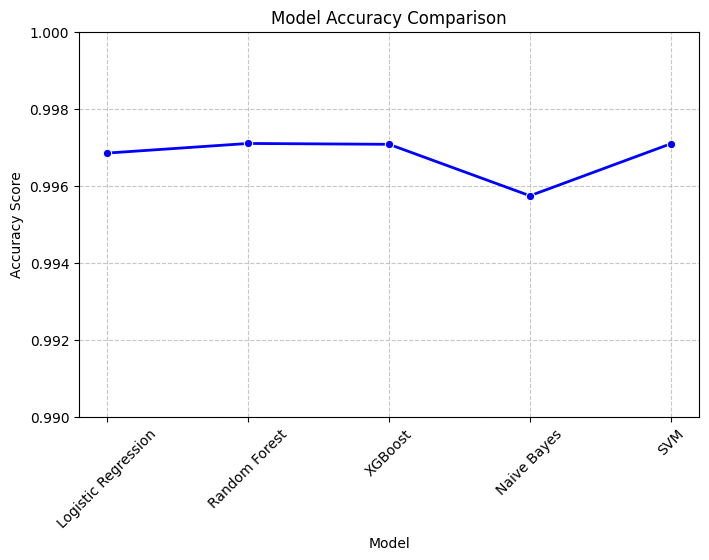

In [9]:
# 6️⃣ Plot accuracy comparison (Line Plot)
import pandas as pd  # Import pandas for DataFrame creation
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from accuracy_results
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=["Model", "Accuracy"])

plt.figure(figsize=(8, 5))
sns.lineplot(x=accuracy_df["Model"], y=accuracy_df["Accuracy"], marker="o", linewidth=2, color="blue")

plt.ylim(0.99, 1)  # Zoom in on the range (adjust based on results)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()


In [10]:
####fine tuning and visualizing the improvment i left it 

In [11]:
# 🔹 PART B: ASSIGNING CRIME SEVERITY

In [12]:
# Define severity levels mapping
severity_mapping = {
    "NON-CRIMINAL": 1, "SUSPICIOUS OCC": 1, "MISSING PERSON": 1, "RUNAWAY": 1, "RECOVERED VEHICLE": 1,
    "WARRANTS": 2, "OTHER OFFENSES": 2, "VANDALISM": 2, "TRESPASS": 2, "DISORDERLY CONDUCT": 2, "BAD CHECKS": 2,
    "LARCENY/THEFT": 3, "VEHICLE THEFT": 3, "FORGERY/COUNTERFEITING": 3, "DRUG/NARCOTIC": 3,
    "STOLEN PROPERTY": 3, "FRAUD": 3, "BRIBERY": 3, "EMBEZZLEMENT": 3,
    "ROBBERY": 4, "WEAPON LAWS": 4, "BURGLARY": 4, "EXTORTION": 4,
    "KIDNAPPING": 5, "ARSON": 5
}

# Function to assign severity with error handling
def assign_severity(category):
    if pd.isna(category):  # Check for missing values
        return -1  # Assign a numerical value for "Unknown" for sorting purposes
    return severity_mapping.get(category, -1)  # Handle unexpected values, assigning -1

# Apply function to dataset
df['Severity'] = df['Category'].apply(assign_severity)


# Save the updated dataset as a new file
df.to_csv("crime_data_with_severity.csv", index=False)

# Show sample data
## Count occurrences of each crime category
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Total Cases']

# Show sample data
print(df[['Category', 'Severity']].drop_duplicates().sort_values('Severity'))

# Keep the original index by selecting the first occurrence of each category
# original_index_df = df[['Category', 'Severity']].reset_index().groupby('Category').first()

# Merge with total cases count
#severity_df = original_index_df.merge(category_counts, on='Category')

# Rename columns
#severity_df.rename(columns={'index': 'Original Index'}, inplace=True)

# Display the table without the first column (default index)
#print(severity_df.to_string(index=False))

print("\nUpdated CSV saved as 'crime_data_with_severity.csv'")
# Display the table
#print(severity_df)




                     Category  Severity
13               NON-CRIMINAL         1
227                   RUNAWAY         1
126            MISSING PERSON         1
51             SUSPICIOUS OCC         1
80345       RECOVERED VEHICLE         1
104                  TRESPASS         2
11                  VANDALISM         2
0                    WARRANTS         2
468        DISORDERLY CONDUCT         2
8821               BAD CHECKS         2
1              OTHER OFFENSES         2
88     FORGERY/COUNTERFEITING         3
1396                  BRIBERY         3
92              DRUG/NARCOTIC         3
3               LARCENY/THEFT         3
6               VEHICLE THEFT         3
31037         STOLEN PROPERTY         3
1888             EMBEZZLEMENT         3
307                     FRAUD         3
33                WEAPON LAWS         4
14                    ROBBERY         4
43                   BURGLARY         4
5983                EXTORTION         4
198                KIDNAPPING         5


C:\Users\96892\AppData\Local\Temp\ipykernel_40060\563928657.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="coolwarm")


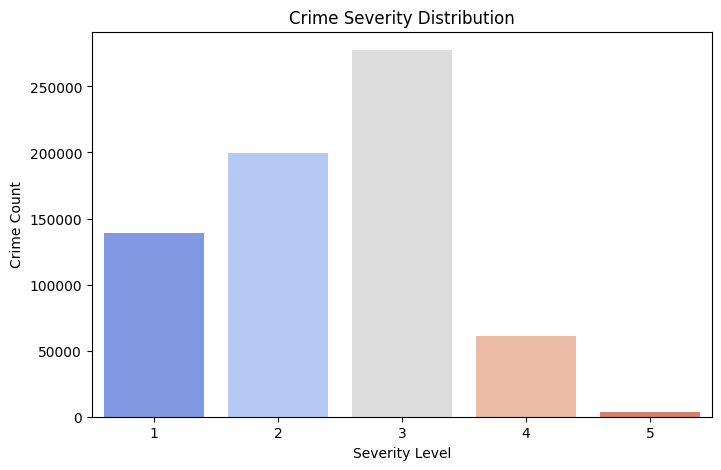

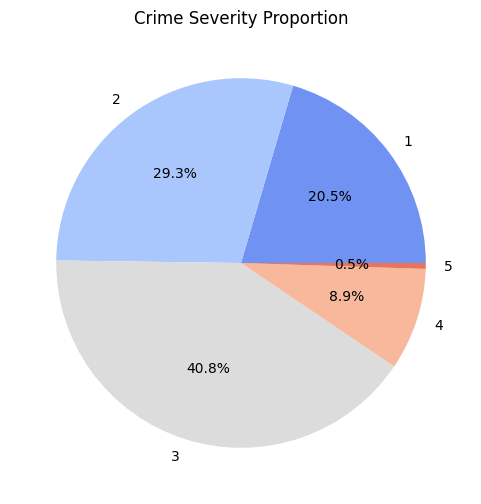

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each severity level
severity_counts = df['Severity'].value_counts().sort_index()

# 🔹 Bar Chart - Crime Severity Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="coolwarm")
plt.xlabel("Severity Level")
plt.ylabel("Crime Count")
plt.title("Crime Severity Distribution")
plt.xticks(rotation=0)
plt.show()

# 🔹 Pie Chart - Crime Severity Proportion
plt.figure(figsize=(6, 6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", len(severity_counts)))
plt.title("Crime Severity Proportion")
plt.show()
